# Guppy Multiple Moving Average (GMMA)

https://www.investopedia.com/terms/g/guppy-multiple-moving-average.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = '^nsei'
start = '2020-01-01'
end = '2023-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [3]:
import talib as ta

In [4]:
# Short-term for EMA
df['EMA3'] = ta.EMA(df['Adj Close'], timeperiod=3)
df['EMA5'] = ta.EMA(df['Adj Close'], timeperiod=5)
df['EMA8'] = ta.EMA(df['Adj Close'], timeperiod=8)
df['EMA10'] = ta.EMA(df['Adj Close'], timeperiod=10)
df['EMA12'] = ta.EMA(df['Adj Close'], timeperiod=12)
df['EMA15'] = ta.EMA(df['Adj Close'], timeperiod=15)

In [5]:
# Long-term for EMA
df['EMA30'] = ta.EMA(df['Adj Close'], timeperiod=30)
df['EMA35'] = ta.EMA(df['Adj Close'], timeperiod=35)
df['EMA40'] = ta.EMA(df['Adj Close'], timeperiod=40)
df['EMA45'] = ta.EMA(df['Adj Close'], timeperiod=45)
df['EMA50'] = ta.EMA(df['Adj Close'], timeperiod=50)
df['EMA60'] = ta.EMA(df['Adj Close'], timeperiod=60)

In [6]:
EMA_Short = df[['EMA3','EMA5','EMA8','EMA10','EMA12','EMA15']]
EMA_Long = df[['EMA30','EMA35','EMA40','EMA45','EMA50','EMA60']]

In [7]:
# Short-term for SMA
df['SMA3'] = ta.SMA(df['Adj Close'], timeperiod=3)
df['SMA5'] = ta.SMA(df['Adj Close'], timeperiod=5)
df['SMA8'] = ta.SMA(df['Adj Close'], timeperiod=8)
df['SMA10'] = ta.SMA(df['Adj Close'], timeperiod=10)
df['SMA12'] = ta.SMA(df['Adj Close'], timeperiod=12)
df['SMA15'] = ta.SMA(df['Adj Close'], timeperiod=15)

In [8]:
# Long-term for SMA
df['SMA30'] = ta.SMA(df['Adj Close'], timeperiod=30)
df['SMA35'] = ta.SMA(df['Adj Close'], timeperiod=35)
df['SMA40'] = ta.SMA(df['Adj Close'], timeperiod=40)
df['SMA45'] = ta.SMA(df['Adj Close'], timeperiod=45)
df['SMA50'] = ta.SMA(df['Adj Close'], timeperiod=50)
df['SMA60'] = ta.SMA(df['Adj Close'], timeperiod=60)

In [9]:
SMA_Short = df[['SMA3','SMA5','SMA8','SMA10','SMA12','SMA15']]
SMA_Long = df[['SMA30','SMA35','SMA40','SMA45','SMA50','SMA60']]

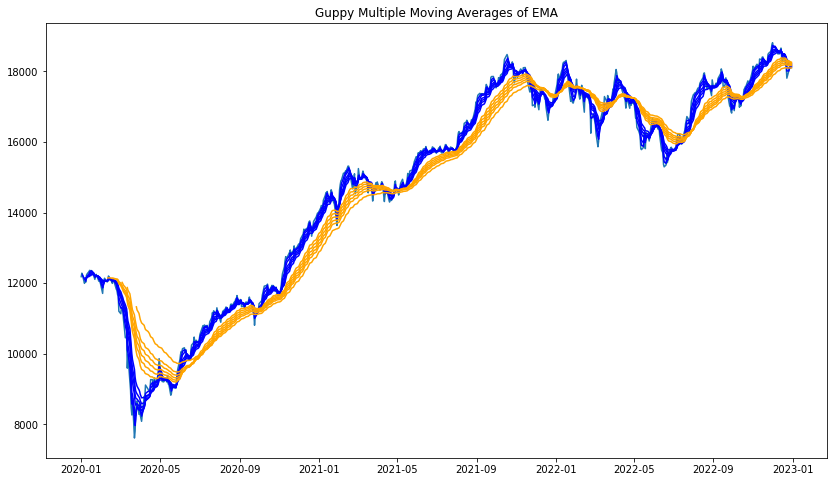

In [10]:
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
plt.plot(EMA_Short, color='blue')
plt.plot(EMA_Long, color='orange')
plt.title('Guppy Multiple Moving Averages of EMA')
plt.show()

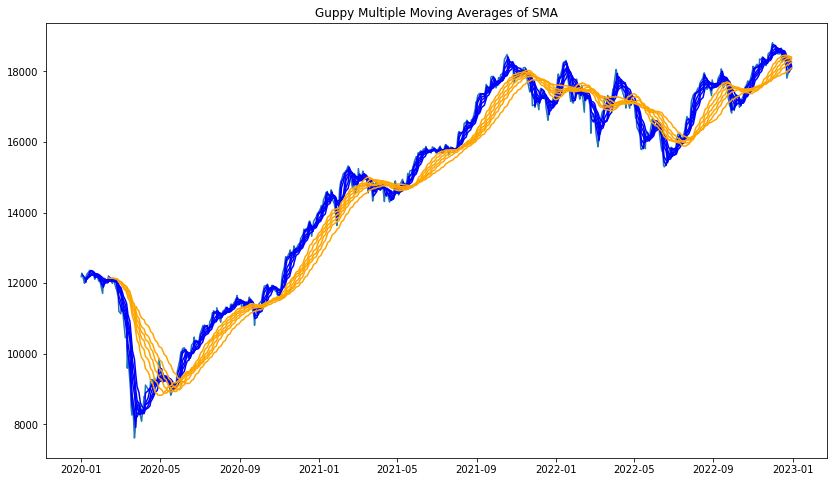

In [11]:
plt.figure(figsize=(14,8))
plt.plot(df['Adj Close'])
plt.plot(SMA_Short, color='blue')
plt.plot(SMA_Long, color='orange')
plt.title('Guppy Multiple Moving Averages of SMA')
plt.show()

## Candlestick with GMMA

In [12]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,EMA3,EMA5,EMA8,...,SMA10,SMA12,SMA15,SMA30,SMA35,SMA40,SMA45,SMA50,SMA60,VolumePositive
0,18261.770833,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,18262.770833,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,18263.770833,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800,12230.450195,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,18266.770833,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500,12111.750000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,18267.770833,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800,12082.350098,12147.470117,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Text(0.5, 0, 'Date')

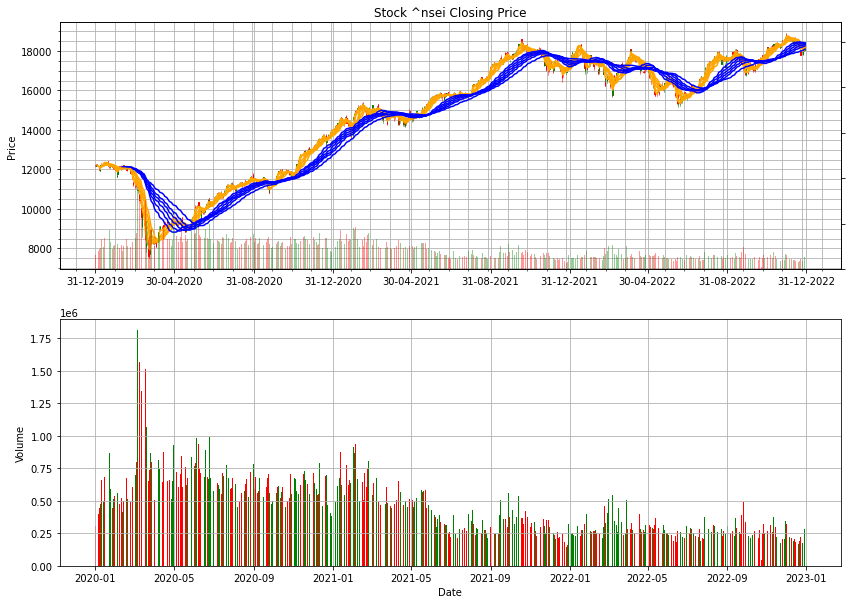

In [15]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(SMA_Short, color='orange')
ax1.plot(SMA_Long, color='blue')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
df['VolumePositive'] = df['Open'] < df['Adj Close']
ax2.bar(df.index, df['Volume'], color=df.VolumePositive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')

Text(0.5, 0, 'Date')

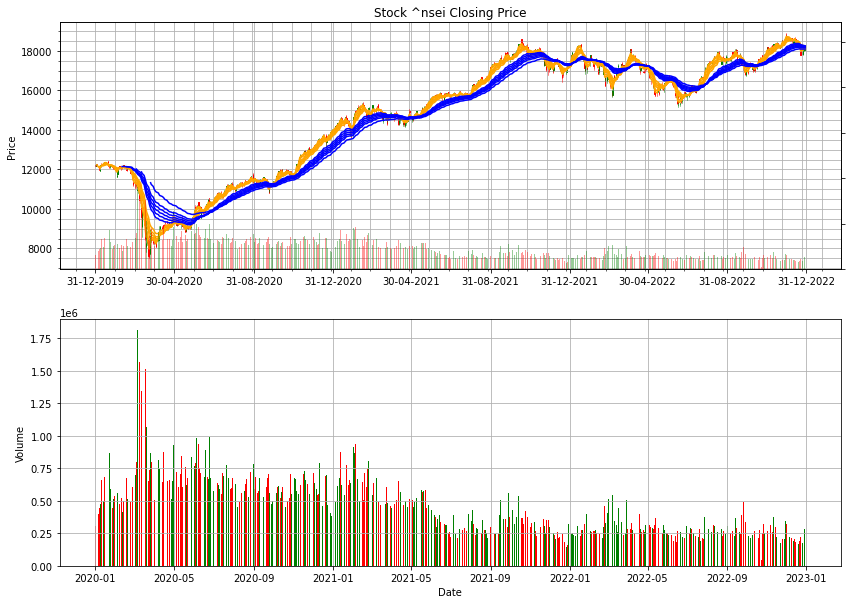

In [14]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(EMA_Short, color='orange')
ax1.plot(EMA_Long, color='blue')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
df['VolumePositive'] = df['Open'] < df['Adj Close']
ax2.bar(df.index, df['Volume'], color=df.VolumePositive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')